<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

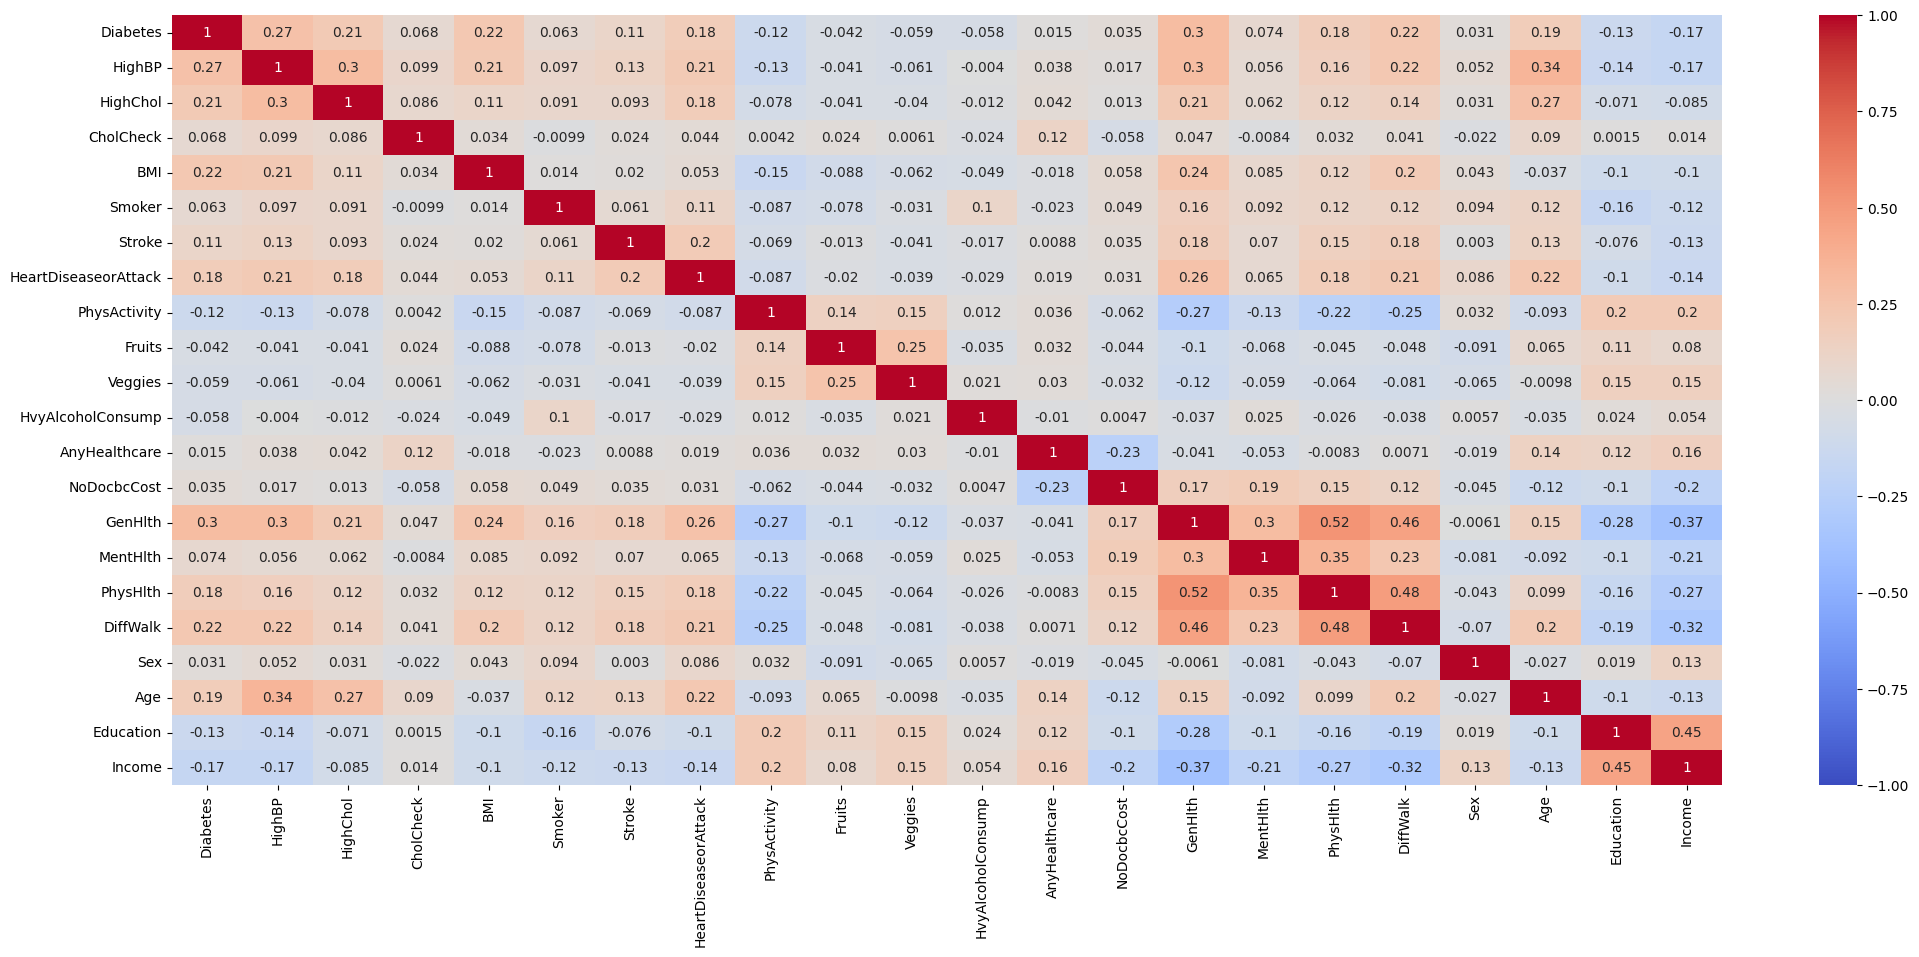

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import pickle

data_frame = pd.read_csv("diabetes.csv")
print(data_frame.info())
print(data_frame.describe())
null_values = data_frame.isnull().sum()
print("Null values: \n", null_values)

# correlation between feature columns to targets
print("Correlation between features and target: \n",data_frame.corr())
corr = data_frame.corr()
plt.figure(figsize=(25,10))
sn.heatmap(corr, vmin=-1,cmap='coolwarm', annot=True)

# not considering below feature columns because their correlation coeffients with target value
# is less than 0.10 and some are even negative, so it wouldn't affect the prediction
# "CholCheck", - 0.065
# "Smoker", - 0.061
# "PhysActivity", - -0.12
# "Fruits", - -0.041
# "Veggies", - -0.057
# "HvyAlcoholConsump", - 0.057
# "AnyHealthCare", - 0.018
# "NoDocbcCost", - 0.031
# "MentHlth", - 0.069
# "Education", - -0.12
# "Income", - -0.16

colmns = [
"HighBP",
"HighChol",
# "CholCheck", 
"BMI",
# "Smoker", 
"Stroke",
"HeartDiseaseorAttack",
# "PhysActivity", 
# "Fruits",
# "Veggies",
# "HvyAlcoholConsump",
# "AnyHealthCare",
# "NoDocbcCost", 
"GenHlth",
# "MentHlth",
"PhysHlth",
"DiffWalk",
"Sex",
"Age",
# "Education",
# "Income",
"Diabetes"
]

df_modified=pd.DataFrame(data_frame, columns=colmns)
print("After rearranging : \n", df_modified.head())

# df_modified.fillna(df_modified.mean(), inplace=True)

df_modified.dropna(axis=1, inplace=True)

x = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]

# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# splitting dataset using train test split method
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("x test \n",X_test)

svc = SVC()
svc.fit(X_train, y_train)
print("Fitting completed")
Y_pred = svc.predict(X_test)
print("SVC Classification Report: \n", classification_report(y_test, Y_pred))
score = svc.score(X_train, y_train)
print("Score: ", score)

pickle.dump(svc, open('model.pkl', 'wb'))


# feature scaling
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# scaler.fit(df_modified)
# X_scaled_array = scaler.transform(df_modified)
# print(X_scaled_array)
# df_scaled = pd.DataFrame(data= X_scaled_array, columns= df_modified.columns)
# print(df_scaled)

# Xs = df_scaled.iloc[:, :-1]
# Ys = df_scaled.iloc[:, -1]

# from sklearn.model_selection import train_test_split
# # splitting dataset using train test split method
# Xs_train, Xs_test,Ys_train, Ys_test = train_test_split(Xs, Ys, test_size = 0.2, random_state = 0)

# svc = SVC()
# svc.fit(Xs_train, Ys_train)
# print("Fitting completed")
# Ys_pred = svc.predict(Xs_test)
# print("Prediction after scaling",Ys_pred)
# print("SVC Classification Report: \n", classification_report(y_test, Y_pred))
# score = svc.score(Xs_train, Ys_train)
# print("Score after scaling: ", score)

# k means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)
yCluster_km = km.predict(x)
print("Output after clustering: \n", yCluster_km)
from sklearn import metrics
silhoeutte_score = metrics.silhouette_score(x, yCluster_km)
print("Silhoeutte score :", silhoeutte_score)

pickle.dump(km, open('km_model.pkl', 'wb'))

In [3]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("RF predicted : \n", rf_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

RF predicted : 
 [0 0 0 ... 0 0 2]
Accuracy: 0.826631977294229


In [6]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
Y_pred = pickled_model.predict(X_test)
print("predicted value", Y_pred)

predicted value [1. 0. 0. ... 1. 0. 1.]
